In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import pysal
import shapely.geometry
from shapely.geometry import Point, Polygon

/Users/edzardschade/.virtualenvs/erstesVE/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


# Erster Import

In [2]:
#Importieren wir die vorgefertige Weltkarte
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

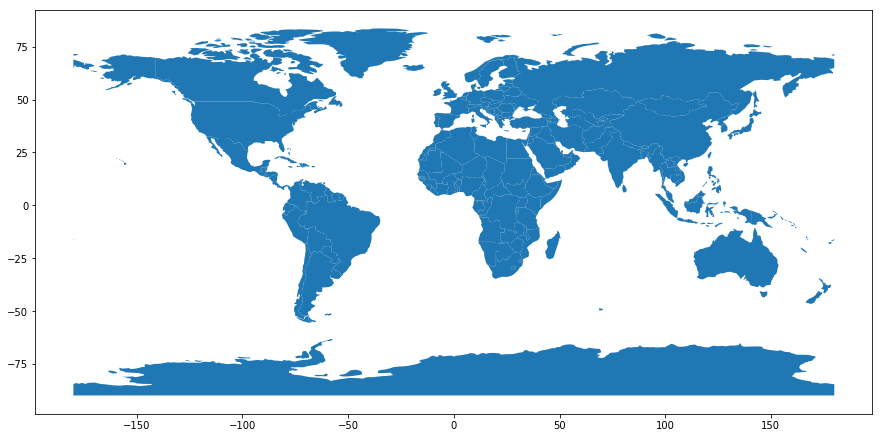

In [3]:
world.plot(figsize=(15,20))

/Users/edzardschade/.virtualenvs/erstesVE/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


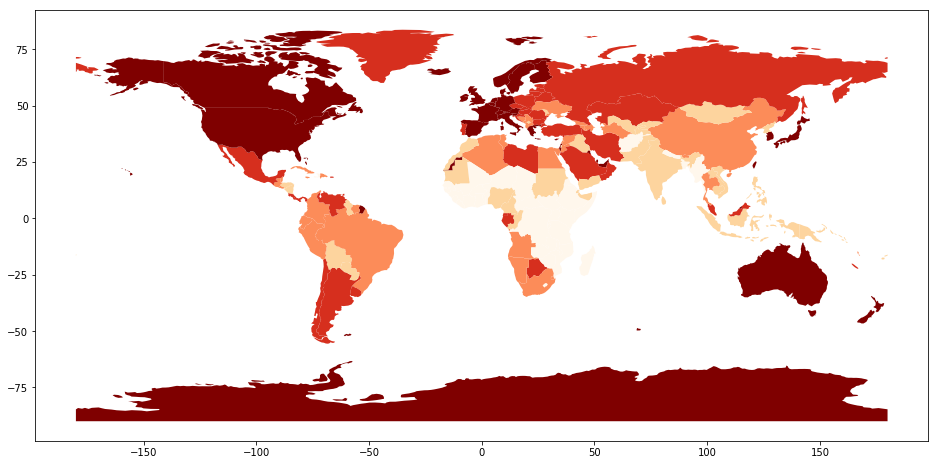

In [18]:
#world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world['gdp_per_cap'] = world['gdp_md_est'] / world['pop_est']
world['gdp_per_cap'] = world['gdp_per_cap'] * 1000
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles', figsize=(16, 20));
plt.savefig('welt.pdf')

In [20]:
!open "welt.pdf" # öffnet mir das pdf in neuem Fenster

In [8]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0.000784
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0.008618
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",0.005993
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",0.038408
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,0.014027
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,...",0.006326
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...,0.200000
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48...",0.114286
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...,0.037634
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,...",0.040133


In [12]:
#pd.set_option('display.max_colwidth', -1) # ändert die Anzeigeanstellung, so dass ich alle Zeichen sehe
#world

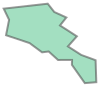

In [14]:
world['geometry'][5] #zeigt mir den 6. Eintrag unter "geometry"

In [15]:
world.crs

{'init': 'epsg:4326'}

# Arbeiten wir mit der Schweiz

In [50]:
ch = gpd.read_file("shapePLZ/plz_verzeichnis_v2.shp") # es müssen immer vier versch. Dateien im Ordner sein
#https://map.geo.admin.ch/?lang=en&topic=ech&bgLayer=ch.swisstopo.pixelkarte-farbe&layers=ch.swisstopo.zeitreihen,ch.bfs.gebaeude_wohnungs_register,ch.bav.haltestellen-oev,ch.swisstopo.swisstlm3d-wanderwege,ch.swisstopo.swissboundaries3d-gemeinde-flaeche.fill&layers_visibility=false,false,false,false,true&layers_timestamp=18641231,,,,&catalogNodes=457,510

In [51]:
del ch['sprachcode_'] # wir werfen diese Spalte raus, da sie none-Werte hat und Fehler produziert.
ch.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 16 columns):
rec_art        5283 non-null object
onrp           5283 non-null float64
bfsnr          5283 non-null float64
plz_typ        5283 non-null float64
postleitzah    5283 non-null float64
plz_zz         5283 non-null object
gplz           5283 non-null float64
ortbez18       5283 non-null object
ortbez27       5283 non-null object
kanton         5283 non-null object
sprachcode     5283 non-null float64
briefz_durc    5283 non-null float64
gilt_ab_dat    5283 non-null float64
plz_briefzu    5283 non-null float64
plz_coff       4150 non-null object
geometry       4134 non-null object
dtypes: float64(9), object(7)
memory usage: 660.5+ KB


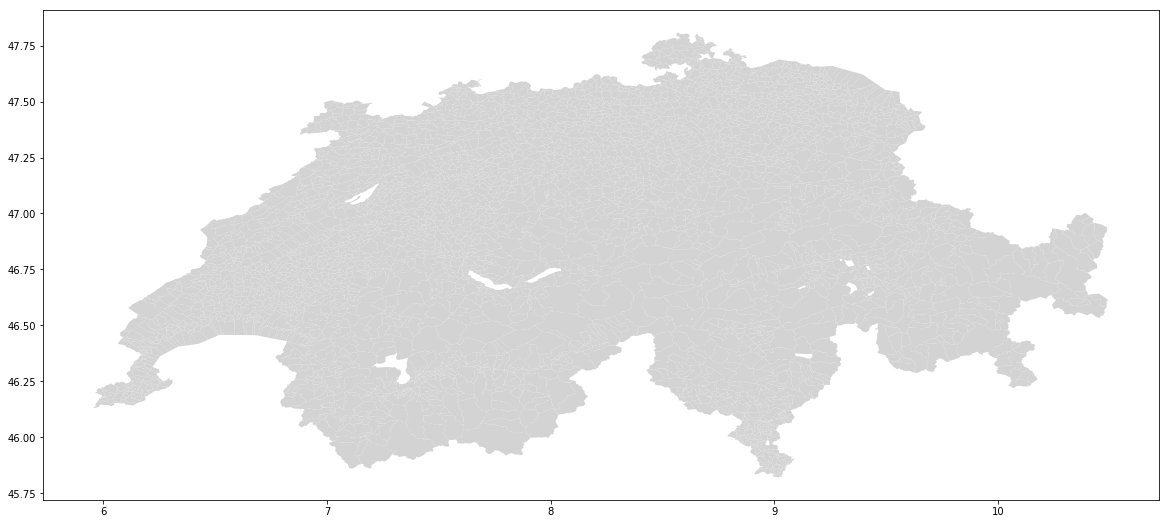

In [52]:
ch.plot(figsize=(20,20), color='lightgrey')
plt.savefig('switzerland.pdf')

In [53]:
df = pd.read_csv('italrest_top10cities.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 6 columns):
Unnamed: 0    1838 non-null int64
Addresse      1838 non-null object
Lat           1838 non-null float64
Lng           1838 non-null float64
Name          1838 non-null object
Rating        1838 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 86.2+ KB


In [54]:
# Step 1: Funktion, um einen Punkt zu machen
def make_point(row):
    return Point(row.Lng, row.Lat)
#df = pd.read_csv('italrest_top10cities.csv')
# Step 2: Den Punkt machen
df['Points'] = df.apply(make_point, axis=1) #axis=1 = berücksichtige die ganze Reihe

In [55]:
df.head()

,Unnamed: 0,Addresse,Lat,Lng,Name,Rating,Points
0,0,"In Gassen 6, 8001 Zürich, Switzerland",47.370705,8.540779,Bindella,4.3,POINT (8.5407788 47.3707055)
1,1,"Augustinergasse 25, 8001 Zürich, Switzerland",47.372218,8.538797,Cantinetta Antinori,4.3,POINT (8.5387974 47.37221760000001)
2,2,"Dufourstrasse 1, 8008 Zürich, Switzerland",47.364525,8.547443,Conti,4.3,POINT (8.547442799999999 47.364525)
3,3,"Nansenstrasse 9, 8050 Zürich, Switzerland",47.410710,8.544784,Mamma Mia,3.9,POINT (8.544783899999999 47.41071029999999)
4,4,"Zeughausstrasse 61, 8004 Zürich, Switzerland",47.376371,8.529278,Italia,4.3,POINT (8.529277699999998 47.3763708)


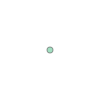

In [56]:
df['Points'][0]

In [57]:
italrests = gpd.GeoDataFrame(df, geometry=list(df['Points'])) # nach der ersten Methode kann es Probleme mit
#geopandas geben. Diese Formel ist sicherer.
italrests.to_csv('italrests.csv', index=False)

Karten und Punkte: Was ist hier passiert?

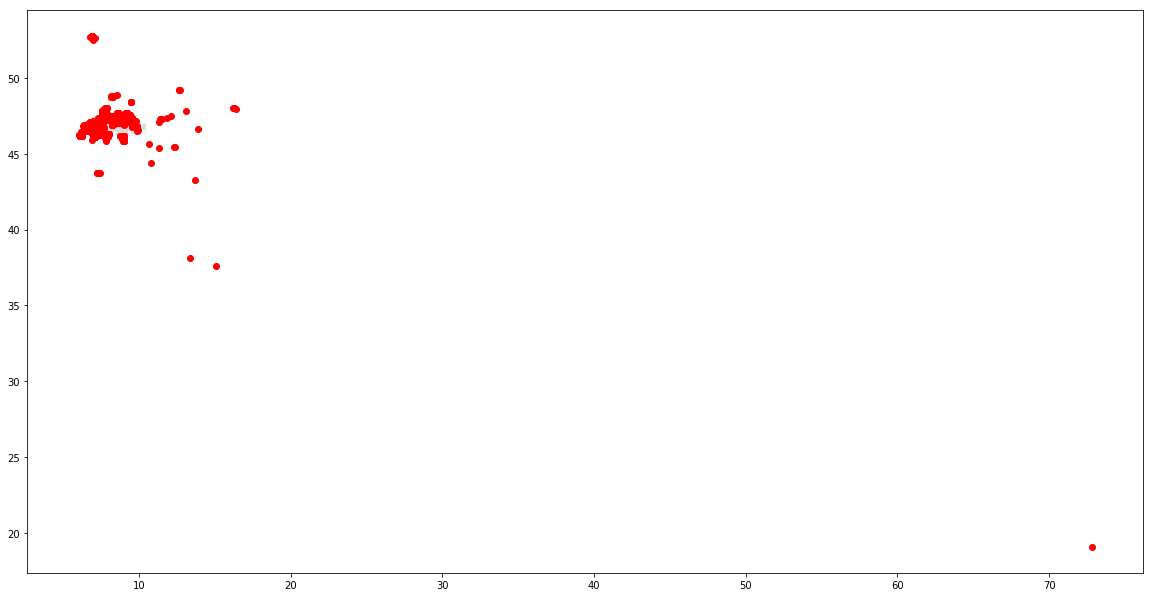

In [58]:
ax = ch.plot(figsize=(20,20), color='lightgrey') # ax = Schweiz
italrests.plot(ax=ax, color='red')

Schneiden wir die Koordinaten ab

In [59]:
italrests = italrests[italrests['Lat'] < 48] # grobe Einschränkung auf die CH-Koordinaten
italrests = italrests[italrests['Lat'] > 45]
italrests = italrests[italrests['Lng']>6]
italrests = italrests[italrests['Lng']<11]

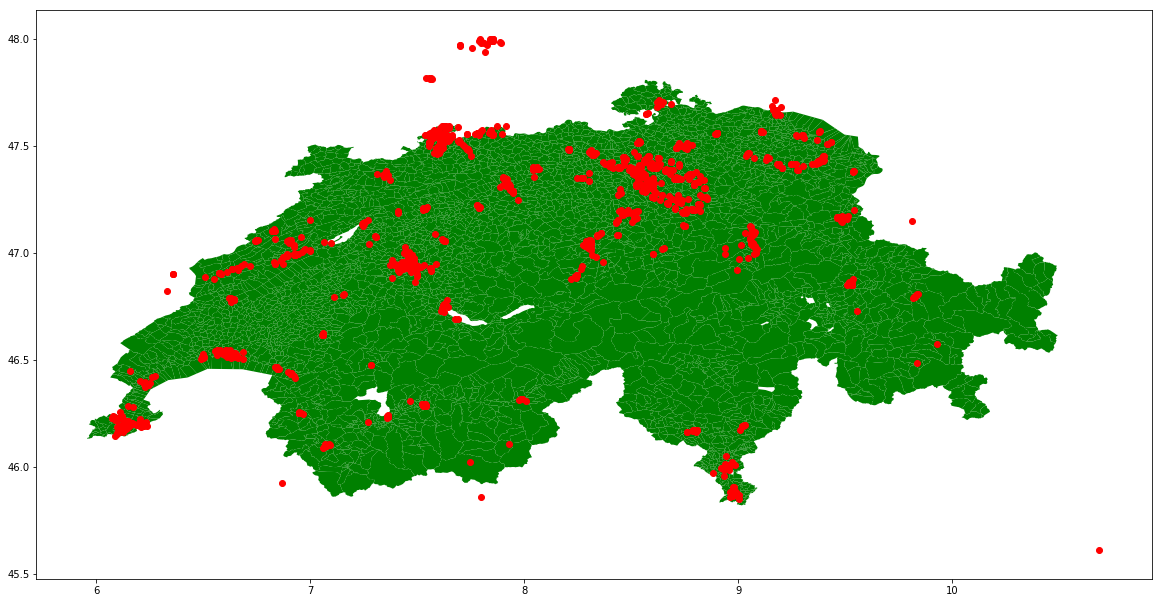

In [60]:
ax = ch.plot(figsize=(20,20), color='green')
italrests.plot(ax=ax, color='red')

# SpatialJoin

In [61]:
# SpatialJoin ist eine viel elegantere Lösung, um die Daten "Restaurants" und CH-Landkarte zu matchen
ch.crs = {'init' :'epsg:4326'} # init' :'epsg:4326 = üblicher Standard, um die Projektion der Daten anzugleichen
italrests.crs = {'init' :'epsg:4326'}

In [62]:
ch = ch.dropna() # alle leeren Zellen kommen weg

In [63]:
ch_with_italrests = gpd.sjoin(italrests, ch, how="inner", op='intersects')

In [64]:
ch.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4134 entries, 0 to 5282
Data columns (total 16 columns):
rec_art        4134 non-null object
onrp           4134 non-null float64
bfsnr          4134 non-null float64
plz_typ        4134 non-null float64
postleitzah    4134 non-null float64
plz_zz         4134 non-null object
gplz           4134 non-null float64
ortbez18       4134 non-null object
ortbez27       4134 non-null object
kanton         4134 non-null object
sprachcode     4134 non-null float64
briefz_durc    4134 non-null float64
gilt_ab_dat    4134 non-null float64
plz_briefzu    4134 non-null float64
plz_coff       4134 non-null object
geometry       4134 non-null object
dtypes: float64(9), object(7)
memory usage: 549.0+ KB


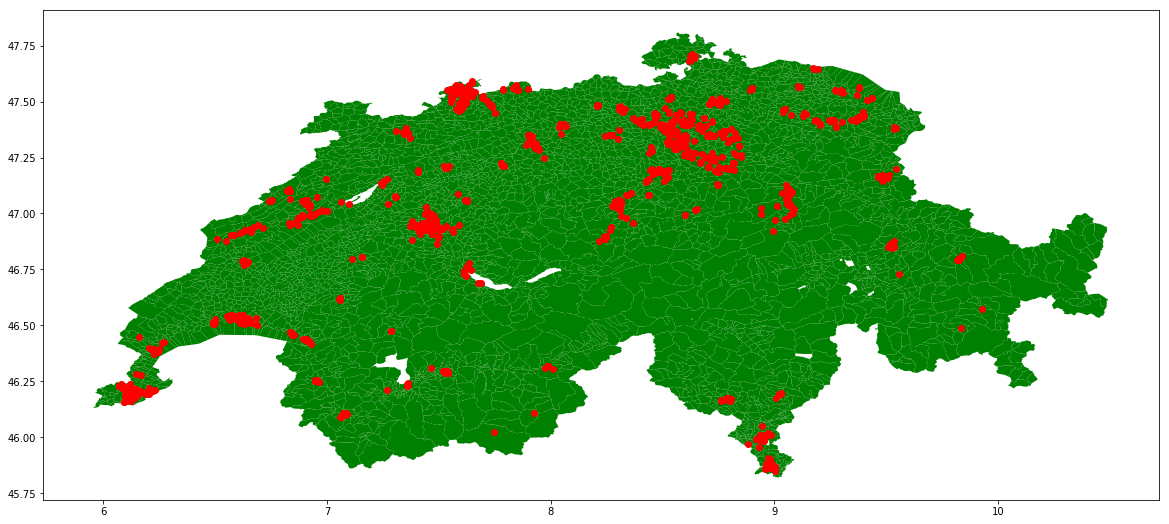

In [65]:
ax = ch.plot(figsize=(20,20), color='green')
ch_with_italrests.plot(ax=ax, color='red')

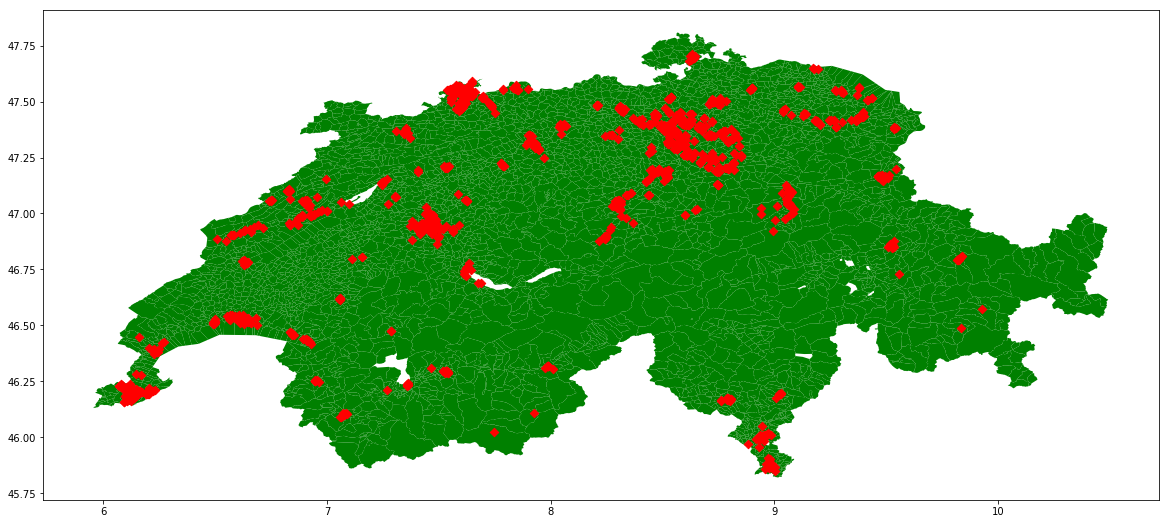

In [70]:
ax = ch.plot(figsize=(20,20), color='green')
ch_with_italrests.plot(ax=ax, color='red', marker='D') # verschiedene "marker" möglich (. / * / + u.a.)
# hier finden wir weitere Marker: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

# Schauen wir uns Zürich an

In [73]:
#https://statistik.zh.ch/internet/justiz_inneres/statistik/de/daten/Raeumliche_Daten/Basiskarten.html
zh = gpd.read_file("GEN_A4_GEMEINDEN_SEEN_2018_F_WGS84_.geojson") # wir nehmen das Shapefile

In [74]:
zh.crs = {'init' :'epsg:3857'}
italrests.crs = {'init' :'epsg:3857'}

In [77]:
zh.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 8 columns):
BFS           170 non-null int64
NAME          170 non-null object
BEZIRKSNAM    166 non-null object
ART_TEXT      170 non-null object
ART_CODE      170 non-null int64
SHAPE_AREA    170 non-null float64
SHAPE_LEN     170 non-null float64
geometry      170 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 10.7+ KB


In [75]:
zh_with_italrests = gpd.sjoin(italrests, zh, how="inner", op='intersects')

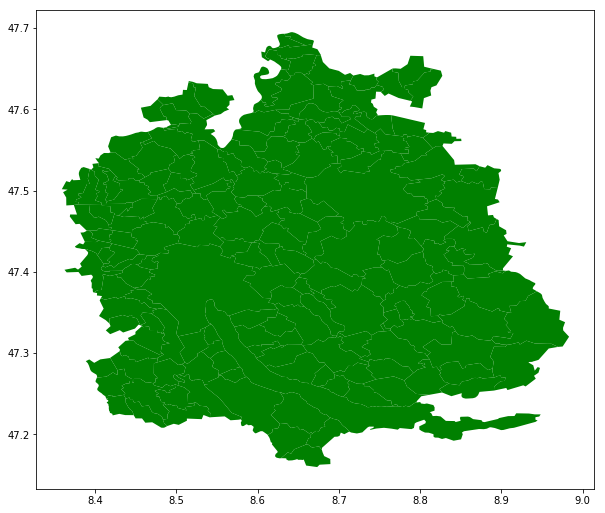

In [76]:
zh.plot(figsize=(10,10), color='green')


In [78]:
zh.crs = {'init' :'epsg:4326'}

In [79]:
zh.crs

{'init': 'epsg:4326'}

In [80]:
from shapely.geometry import Point, Polygon

In [81]:
zh = gpd.read_file("GEN_A4_GEMEINDEN_SEEN_2018_F_WGS84_.geojson")

In [82]:
zh_with_italrests = gpd.sjoin(italrests, zh, how="inner", op='intersects')
zh.crs = {'init' :'epsg:4326'}
italrests.crs = {'init' :'epsg:4326'}

/Users/edzardschade/.virtualenvs/erstesVE/lib/python3.7/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


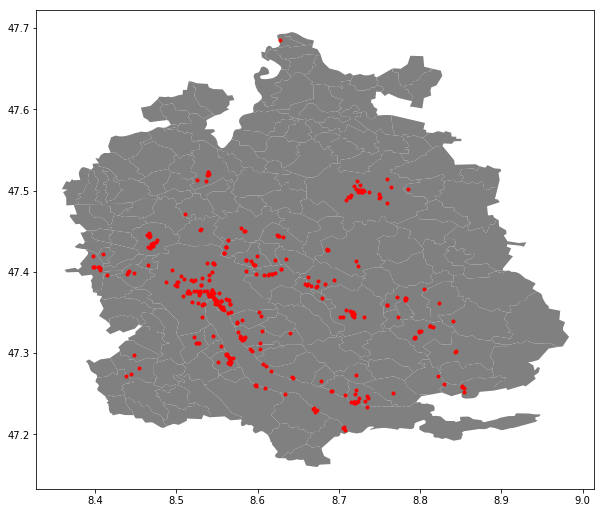

In [83]:
ax = zh.plot(figsize=(10,10), color='grey')
zh_with_italrests.plot(ax=ax, color='red', marker=".") # die Daten können kaum stimmen, es hat doch sicher in
# in jeder Gemeinde italienische Restaurants 